In [1]:
%cd ..
import os
save_dir = os.path.join(os.getcwd(), 'exps', 'figs')

F:\Code\Computer Science\EAI2


## Plot Activation Functions

In [ ]:
import torch.nn as nn
import torch
from core.plotter import Plotter
acts = {
    "Sigmoid": nn.Sigmoid,
    "tanH": nn.Tanh,
    "ReLU": nn.ReLU,
    "PReLU": nn.PReLU,
    "ELU": nn.ELU,
    "GeLU": nn.GELU,
    "SiLU": nn.SiLU
}
rcParams = {
    "xtick.labelsize": 20,
    "ytick.labelsize": 20,
    "axes.titlesize": 40,
}
plotter1 = Plotter((1, 1), (16, 8), save_dir=save_dir, rcParams=rcParams)
plotter2 = Plotter((1, 1), (16, 8), save_dir=save_dir, rcParams=rcParams)
for name, act in acts.items():
    xx = torch.linspace(-3, 3, 500, requires_grad=True)
    yy = act()(xx)
    grad = torch.autograd.functional.jacobian(act(), inputs=xx, create_graph=True).diagonal()
    plotter1.plot(0, 0, xx.detach().numpy(), yy.detach().numpy(), label=name)
    plotter2.plot(0, 0, xx.detach().numpy(), grad.detach().numpy(), label=name)

plotter1.set_labels(0, 0, "Inputs", "Outputs")
plotter2.set_labels(0, 0, "Inputs", "Gradients")
plotter1.legend(0, 0)
plotter2.legend(0, 0)

plotter1.save("plot_activations")
plotter2.save("plot_grads")

## Plot Benchmark Acc

In [5]:
from plot_funcs import plot_acc
import wandb

api = wandb.Api(timeout=120)
def convert_name(runs):
    act_mapping = {
        "gelu": "GeLU",
        "relu": "ReLU",
        "tanh": "tanh",
        "sigmoid": "Sigmoid"
    }
    return {run.config["name"]: act_mapping[run.config["act"]] for run in runs if run.config["act"] in act_mapping}


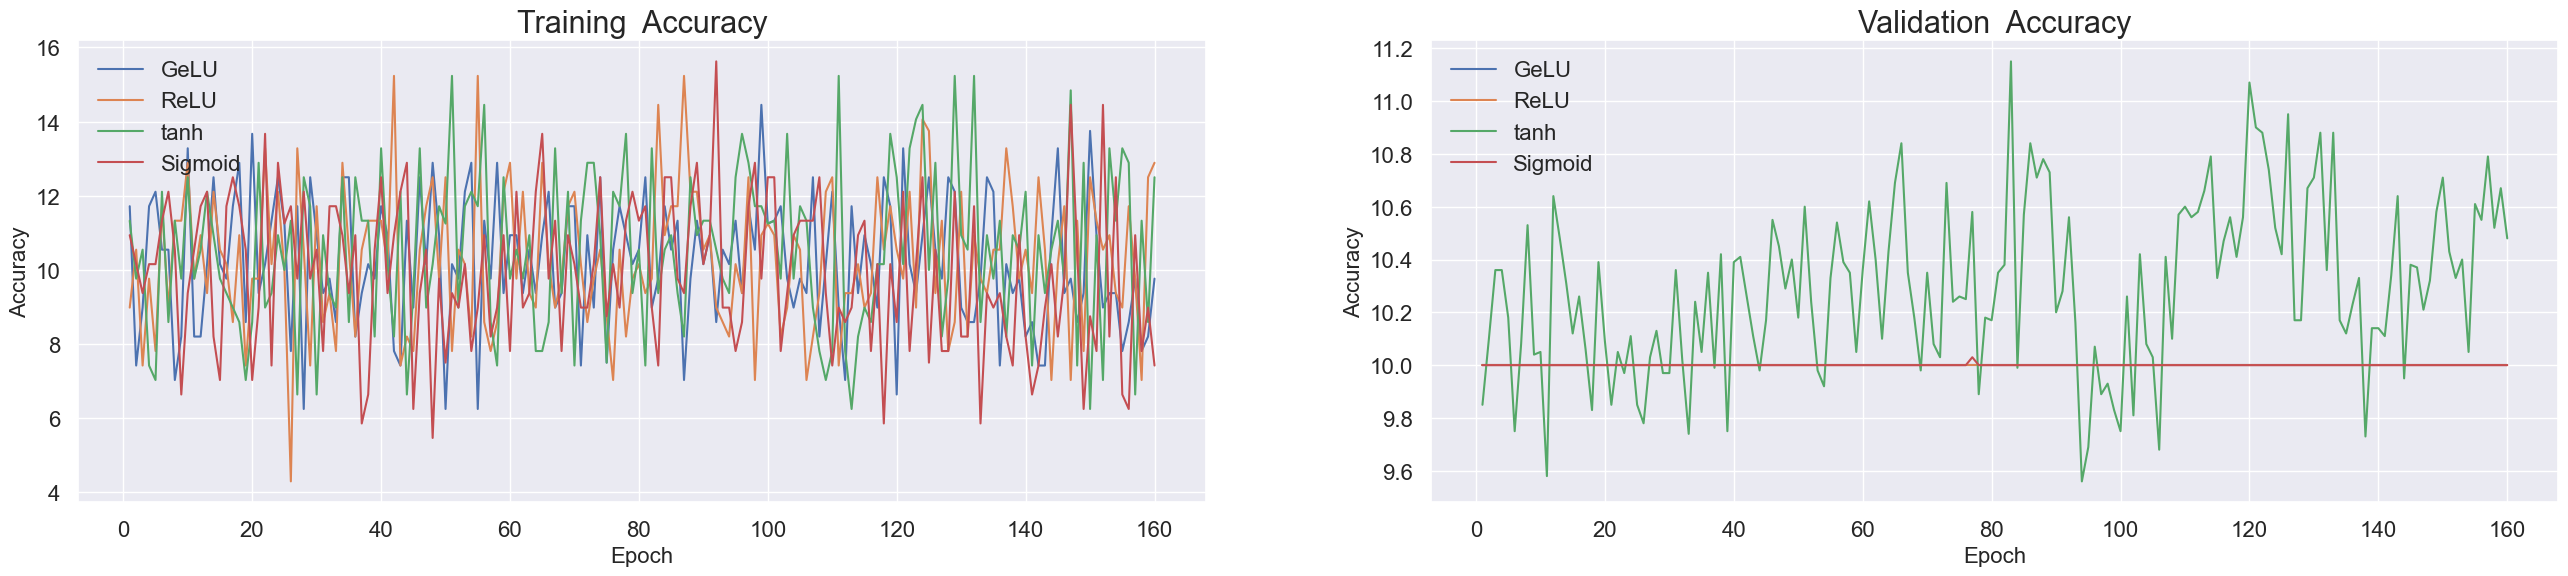

In [6]:
filters = {"config.bn": False, "config.init": False, "config.net": "resnet34"}
this_runs = api.runs("orangebai/EAI_comp_act", filters=filters)
plot_acc(this_runs, convert_name(this_runs), save_dir, "resnet34")

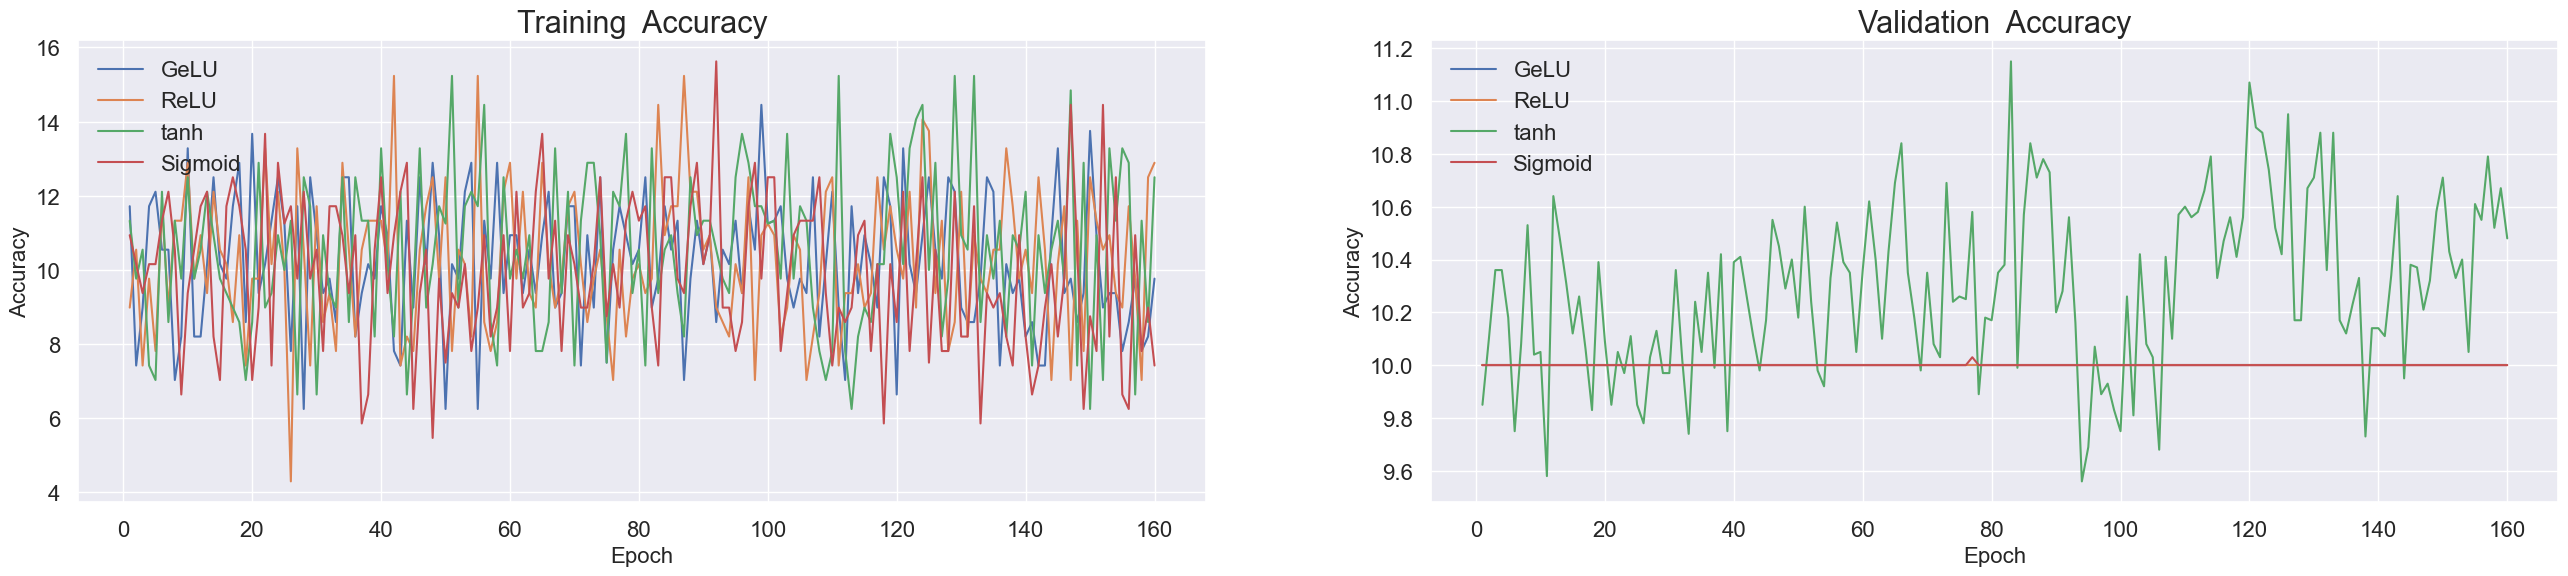

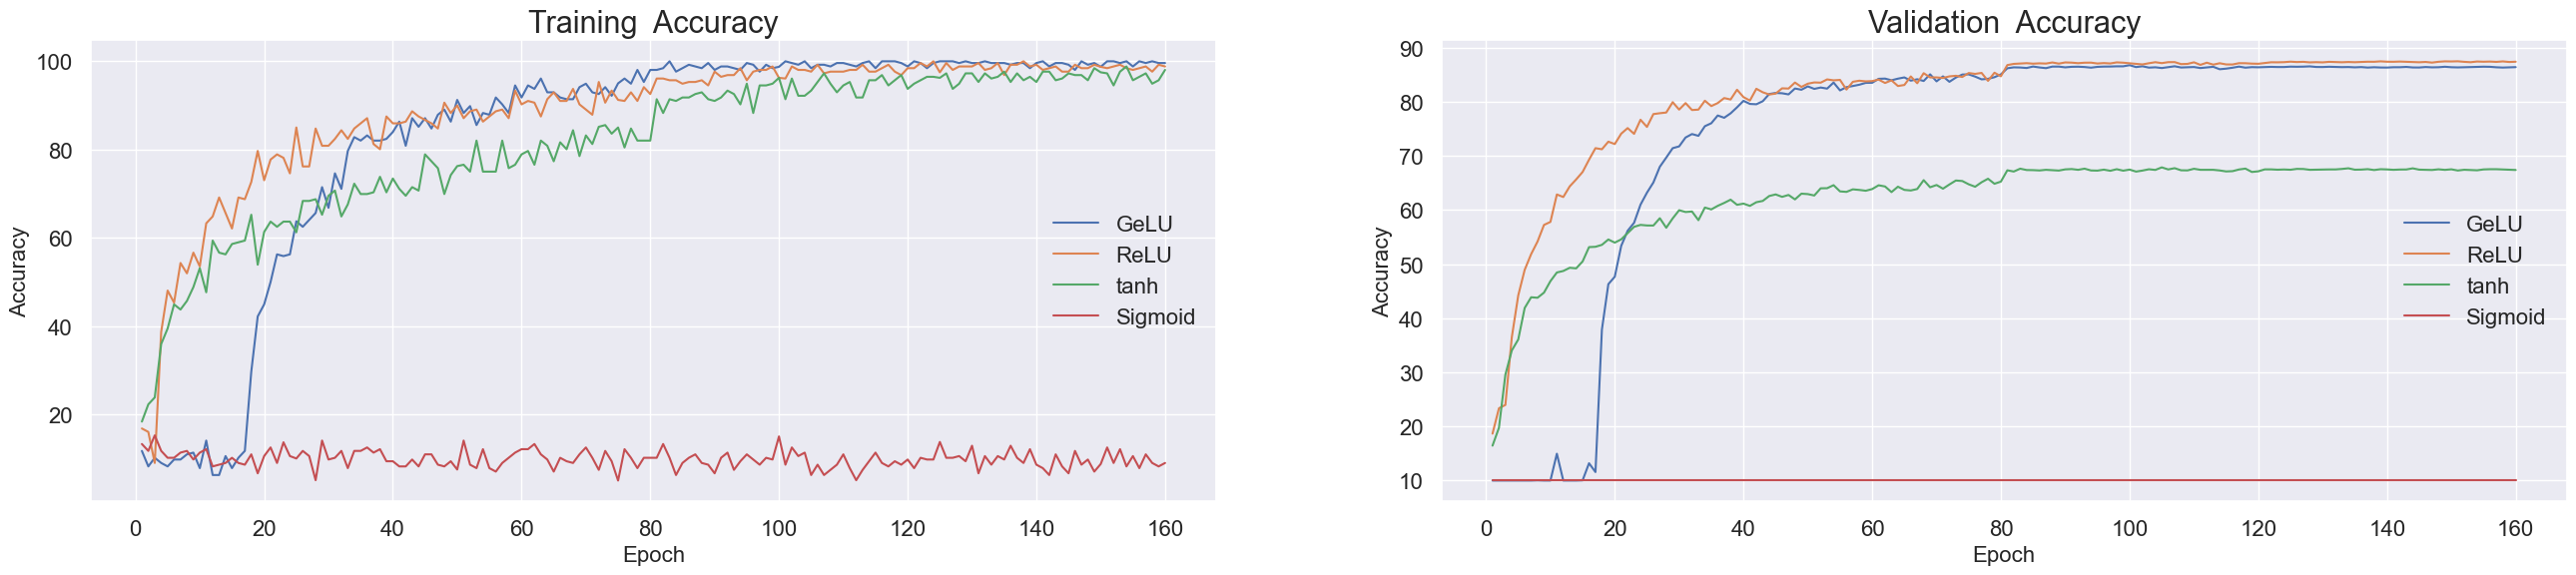

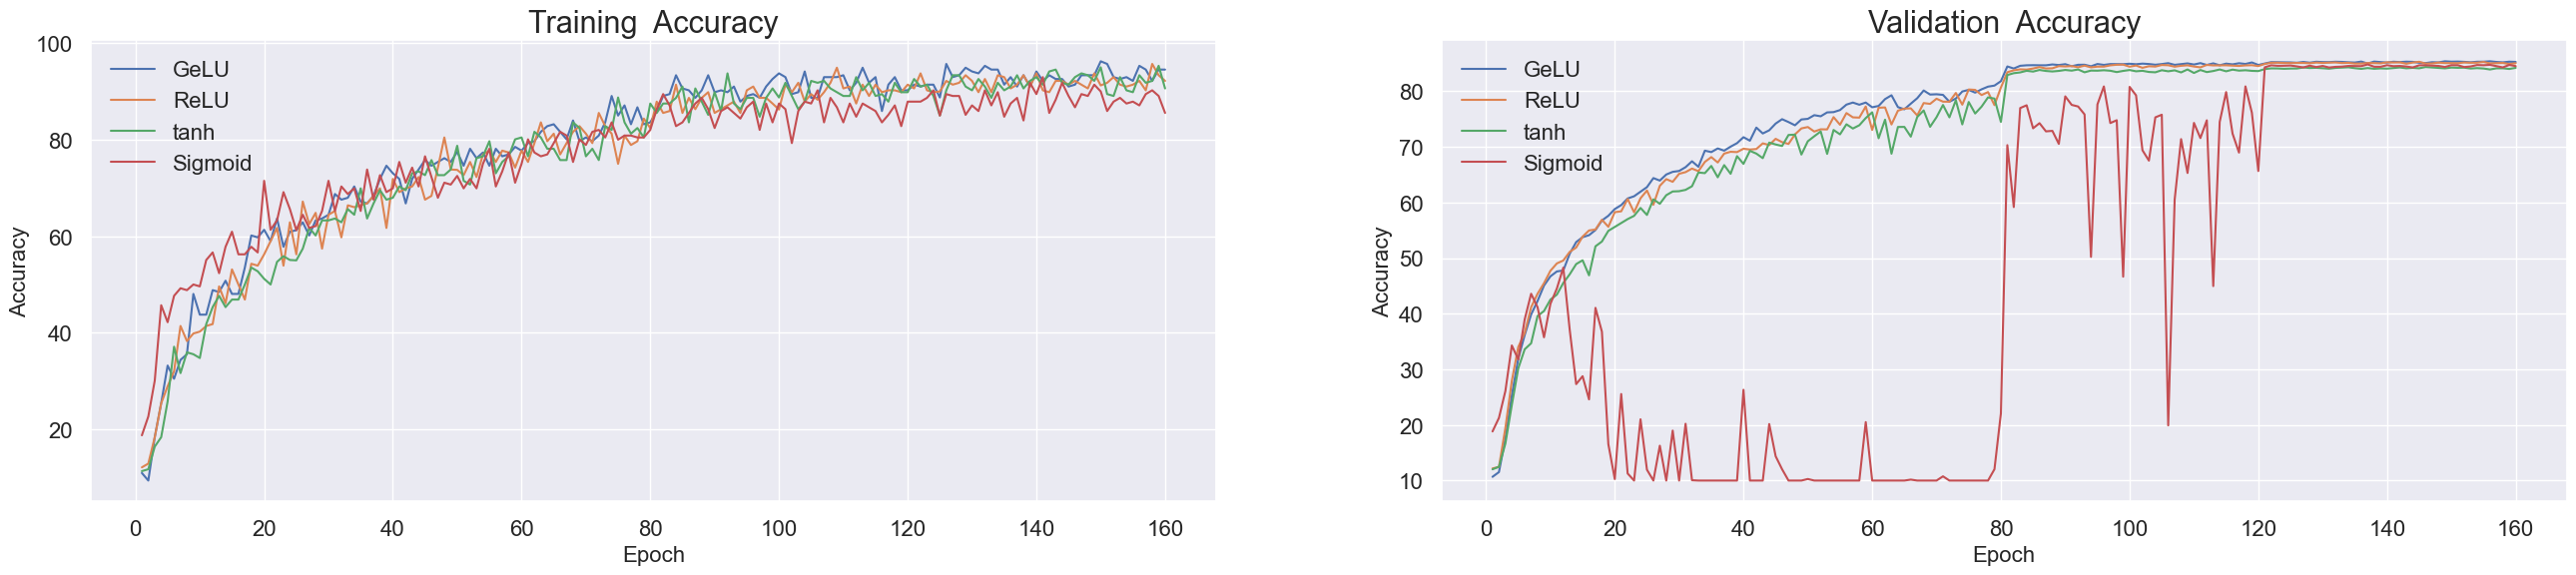

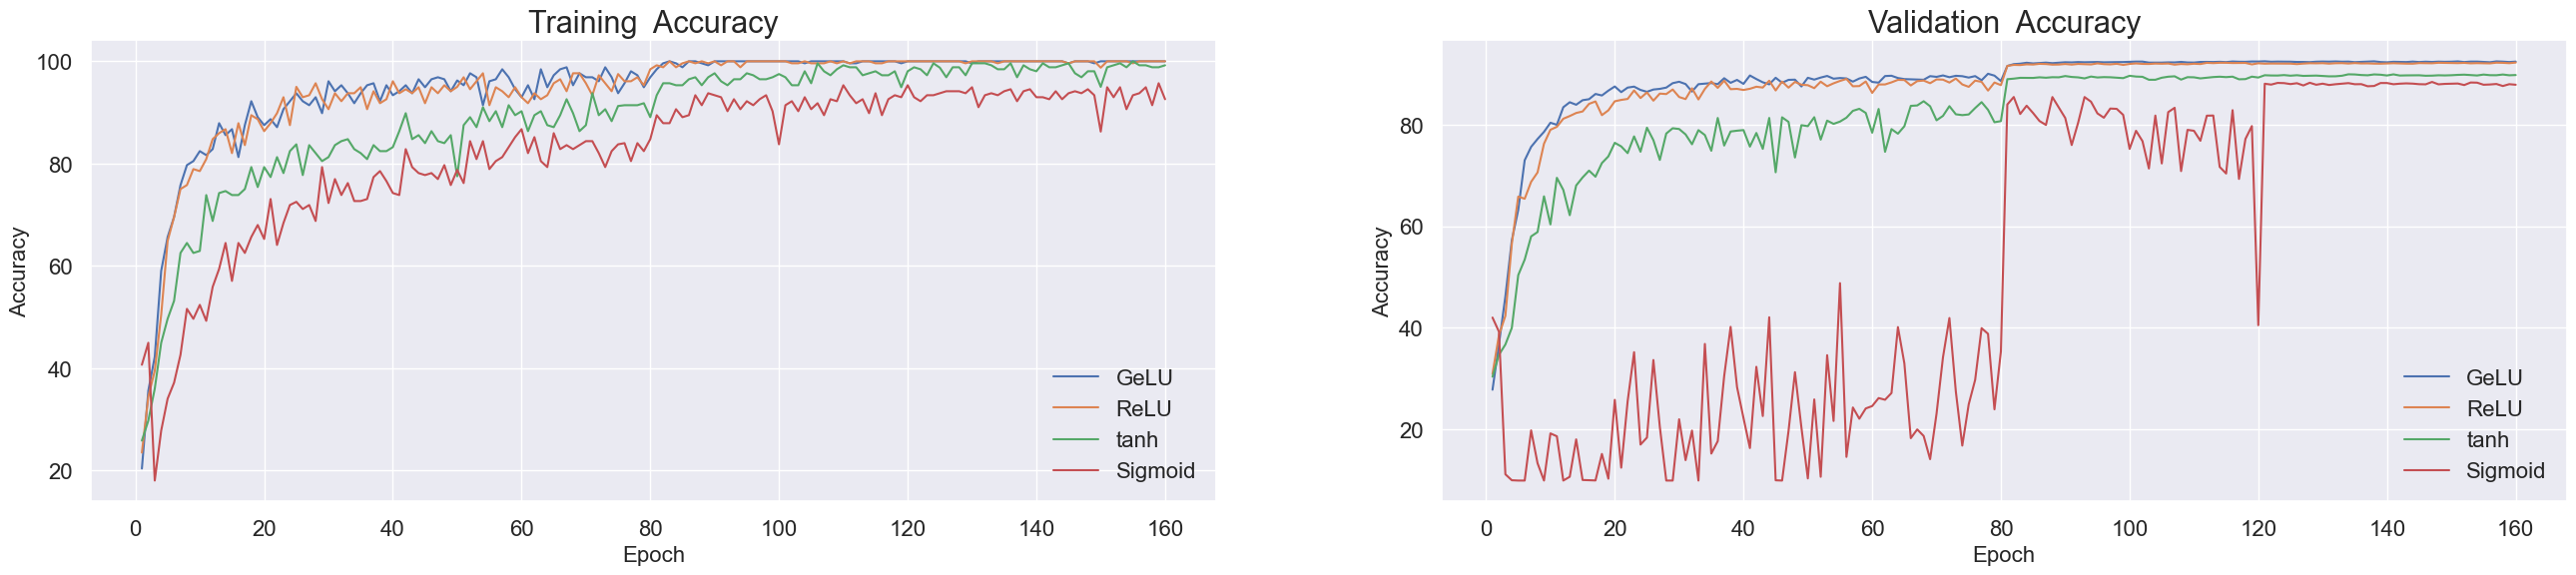

In [7]:
filters = {"config.bn": False, "config.init": False, "config.net": "resnet34"}
this_runs = api.runs("orangebai/EAI_comp_act", filters=filters)
plot_acc(this_runs, convert_name(this_runs), save_dir, "resnet34")

filters = {"config.bn": False, "config.init": True, "config.net": "resnet34"}
this_runs = api.runs("orangebai/EAI_comp_act", filters=filters)
plot_acc(this_runs, convert_name(this_runs), save_dir, "resnet34-init")

filters = {"config.bn": True, "config.init": False, "config.net": "resnet34"}
this_runs = api.runs("orangebai/EAI_comp_act", filters=filters)
plot_acc(this_runs, convert_name(this_runs), save_dir, "resnet34-bn")

filters = {"config.bn": True, "config.init": True, "config.net": "resnet34"}
this_runs = api.runs("orangebai/EAI_comp_act", filters=filters)
plot_acc(this_runs, convert_name(this_runs), save_dir, "resnet34-bn-init")

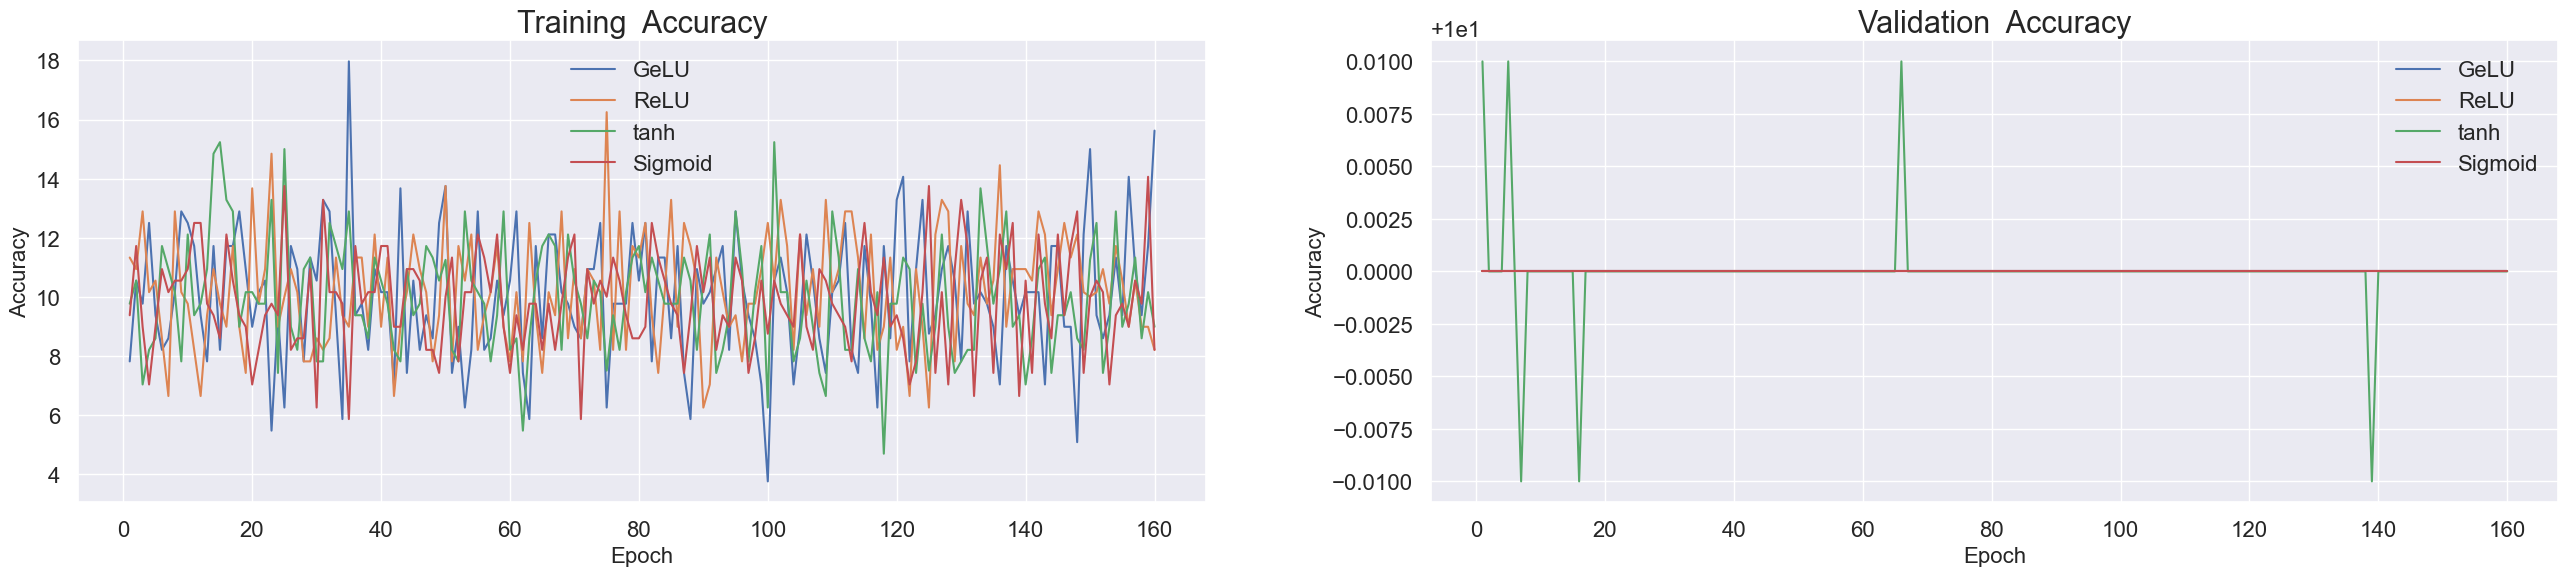

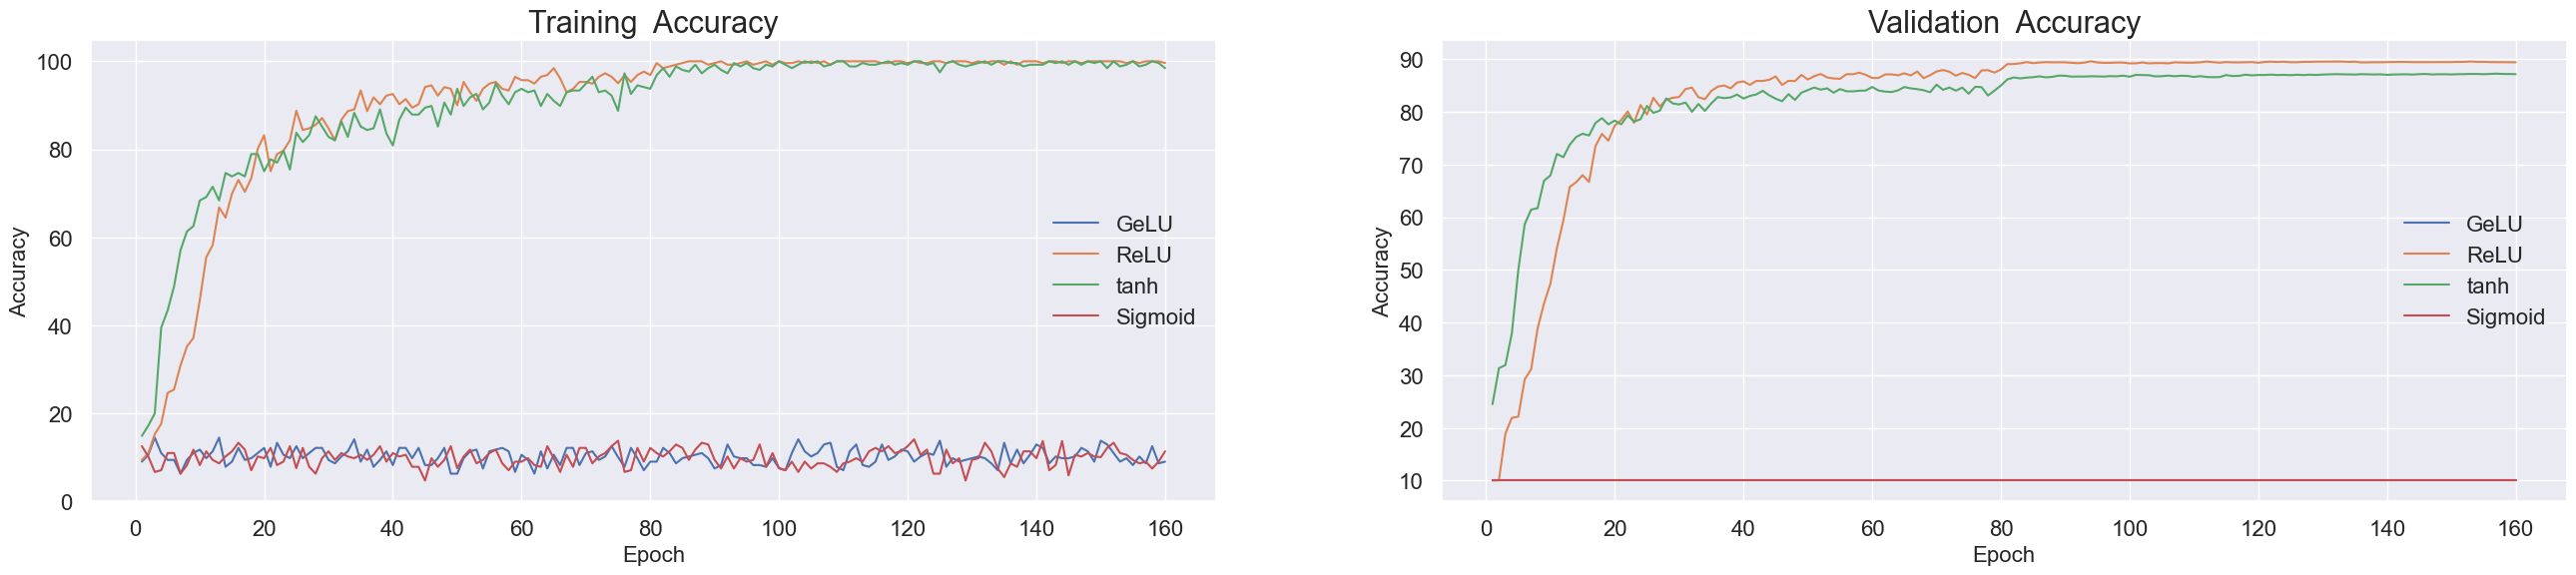

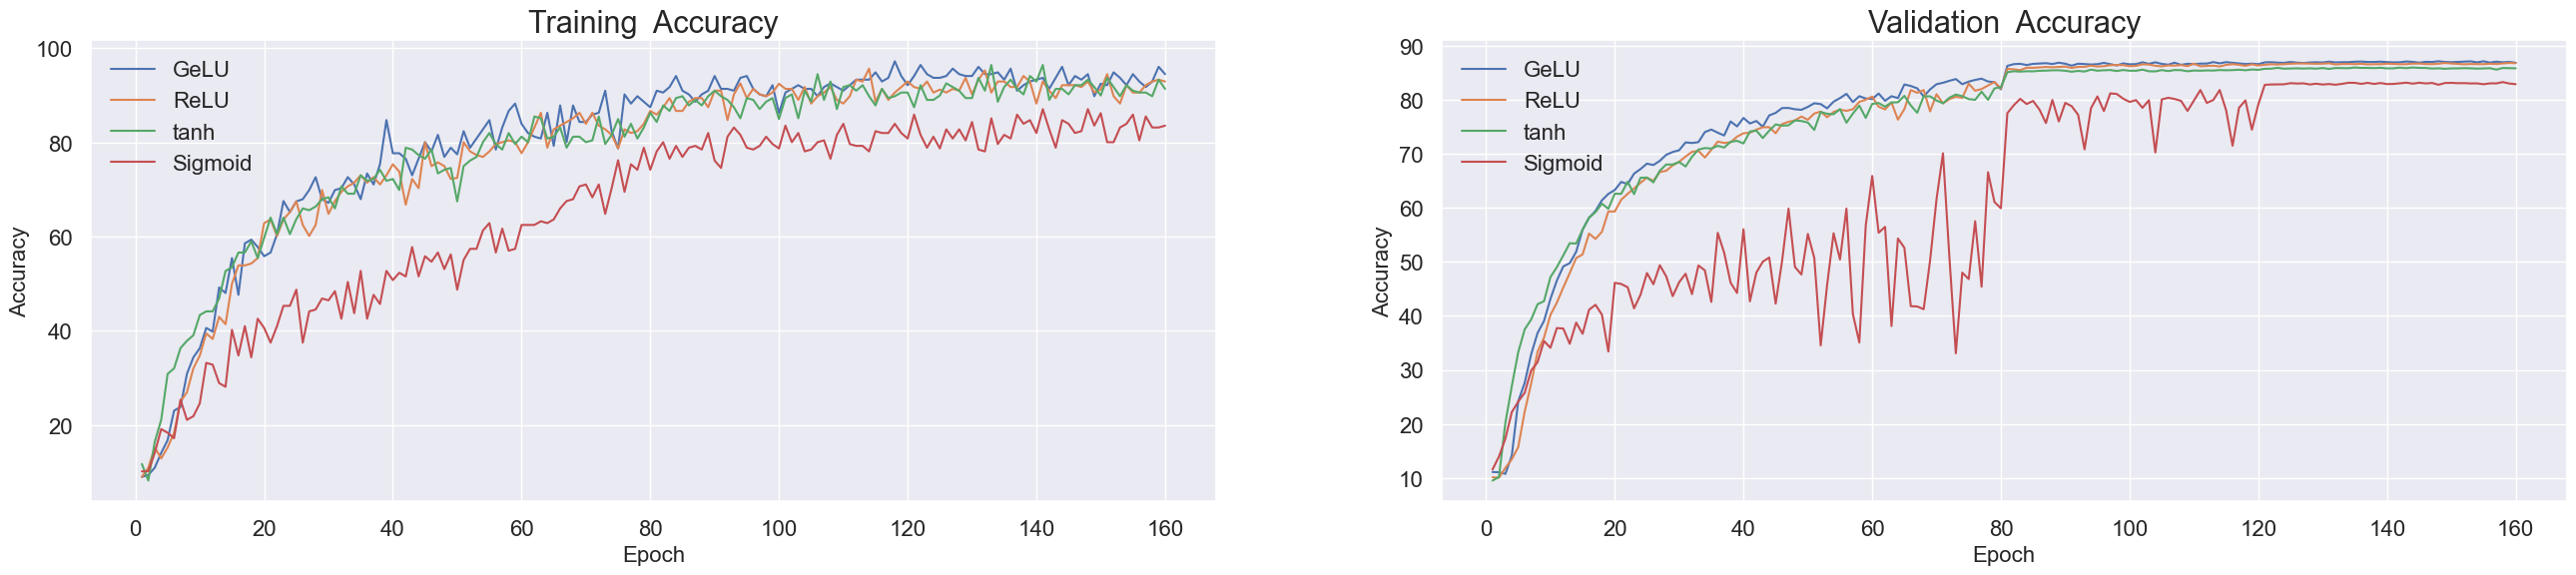

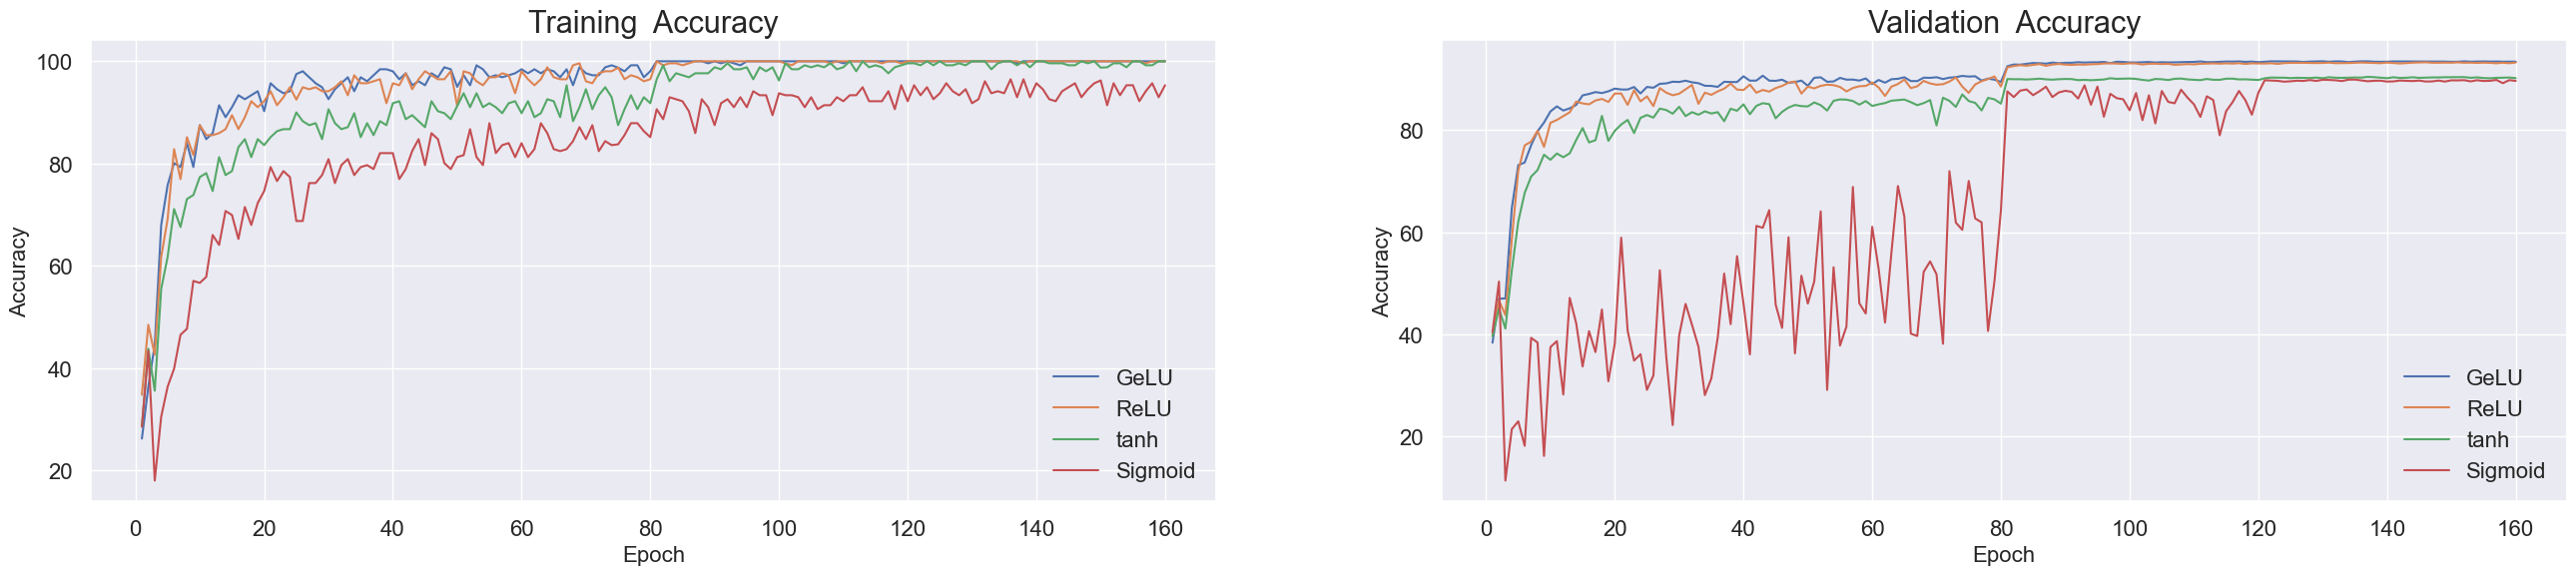

In [8]:
filters = {"config.bn": False, "config.init": False, "config.net": "vgg16"}
this_runs = api.runs("orangebai/EAI_comp_act", filters=filters)
plot_acc(this_runs, convert_name(this_runs), save_dir, "vgg16")

filters = {"config.bn": False, "config.init": True, "config.net": "vgg16"}
this_runs = api.runs("orangebai/EAI_comp_act", filters=filters)
plot_acc(this_runs, convert_name(this_runs), save_dir, "vgg16-init")

filters = {"config.bn": True, "config.init": False, "config.net": "vgg16"}
this_runs = api.runs("orangebai/EAI_comp_act", filters=filters)
plot_acc(this_runs, convert_name(this_runs), save_dir, "vgg16-bn")

filters = {"config.bn": True, "config.init": True, "config.net": "vgg16"}
this_runs = api.runs("orangebai/EAI_comp_act", filters=filters)
plot_acc(this_runs, convert_name(this_runs), save_dir, "vgg16-bn-init")